# Dataset

The dataset contains 1024 64x64 snapshots of a swirling flame generated by the BIMER apparatus [[1]](https://doi.org/10.1115/1.4044998). 

![BIMER setup!](Exp_setup.png "BIMER setup")


The flame is excited by modulating the air flow with a frequency equal to 100 Hz. The sampling frequency is equal to 2500 Hz, and the frequency resolution is 2.44 Hz.

The images measure the intensity of the CH* emission from dodecane flames.

# Exercise 1: Proper Orthogonal Decomposition

The POD is a modal analysis technique used to:
- identify the most energetic structures in the flow. 
- compress the data.

It is equivalent to the PCA and KLT.

## Algorithm 

To apply the POD, the dataset has to be arranged as a data matrix $\mathbf{X} \in \mathbb{R}^{n, m}$, where $n$ represents the number of points in space (pixels) and $m$ is the number of timesteps.

Then, we center the dataset by removing the time-wise average field

\begin{equation}
    \mathbf{X}_0(\mathbf{r}, t) = \mathbf{X}(\mathbf{r}, t) - \bar{\mathbf{x}}(\mathbf{r})
\end{equation}

We do this to analyse the fluctuations around the mean. In the KKL theorem, the snapshots are samples form a centered stochastic process. 

The first step of the POD algorithm consists in computing the covariance matrix $K = \frac{1}{n-1}\mathbf{X}_0^T \mathbf{X}_0$, where each element $K_{i,j}$ is obtained as the inner product between the $i$-th and $j$-th snapshots $K_{i,j} = \langle \mathbf{x}_i, \mathbf{x}_j \rangle$.

Then, we compute the eigendecomposition of the covariance matrix:
\begin{equation}
    \mathbf{K} = \mathbf{V} \mathbf{L} \mathbf{V}^T
\end{equation}

The eigenvectors $\mathbf{V}$ are also called the principal components, and they identify the directions of maximum variance in the dataset.

The POD modes are found by transforming the original dataset with the new basis

\begin{equation}
    \mathbf{Z} = \mathbf{X}_0 \mathbf{V}
\end{equation}

The POD can be computed also by applying the singular value decomposition:

\begin{equation}
    \mathbf{X}_0 = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
\end{equation}

The singular values in the diagonal matrix $\boldsymbol{\Sigma}$ are the square root of the eigenvalues $\mathbf{L}$.

## Properties

- The POD decouples the spatial information in $\mathbf{U}$ from the temporal information in $\mathbf{V}$.

- Both $\mathbf{U}$ and $\mathbf{V}$ are orthonormal.

- The eigenvalues represent the (relative) information content, and are thus used to identify the most important flow structures.

- The less important modes can be discarded without loosing much information:

\begin{equation}
    \mathbf{X}_0 \approx \mathbf{U}_q \boldsymbol{\Sigma}_q \mathbf{V}_q^T
\end{equation}




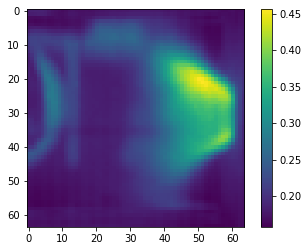

In [1]:
# Task 1: compute and plot the time-averaged field

import numpy as np
import matplotlib.pyplot as plt

X = np.load('X_100_r64.npy')
#Use this one on the cluster
# X = np.load('/home/nct00/nct00006/ercoftac2023/X_100_r64.npy') 

resolution = (64, 64)
dt = 1/2500
n, m = X.shape

x_avg = np.mean(X, axis=1)

fig, ax = plt.subplots()
im = ax.imshow(x_avg.reshape(resolution))
fig.colorbar(im)
plt.show()

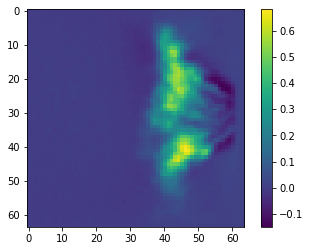

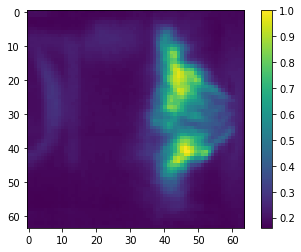

In [2]:
# Task 2: center the data matrix and plot a centered image. 
#         Compare it with the original sample.

X0 = X - x_avg[:, np.newaxis]


fig, ax = plt.subplots()
im = ax.imshow(X0[:,0].reshape(resolution))
fig.colorbar(im)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(X[:,0].reshape(resolution))
fig.colorbar(im)
plt.show()

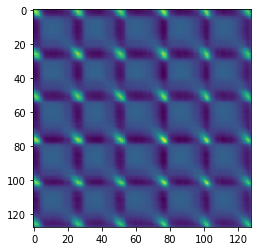

In [4]:
# Task 3: compute the covariance matrix and visualize the first 128x128 block

K = 1/(X0.shape[1]-1) * X0.T @ X0

plt.imshow(K[:128,:128])
plt.show()

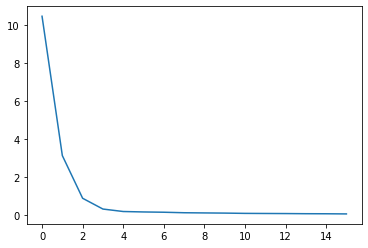

In [5]:
# Task 4: diagonalize the covariance matrix, and sort L and V by decreasing eigenvalues
#         plot the distribution of the first 16 eigenvalues

L, V = np.linalg.eig(K)

i_sort = np.argsort(L)[::-1]
L = L[i_sort]
V = V[:, i_sort]

plt.plot(L[:16])
plt.show()

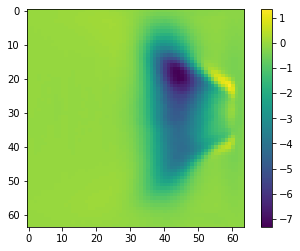

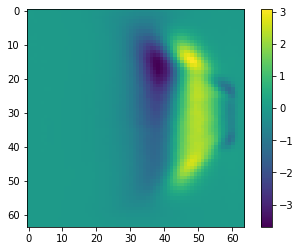

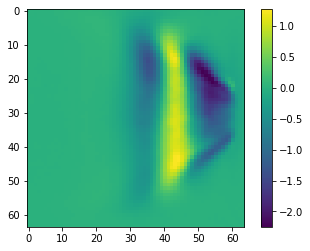

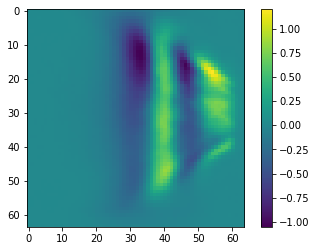

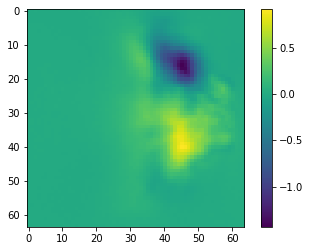

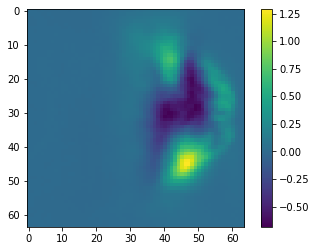

In [6]:
# Task 5: compute the POD modes and plot the first 6.

Z = X0 @ V

for i in range(6):
    fig, ax = plt.subplots()
    im = ax.imshow(Z[:,i].reshape(resolution))
    fig.colorbar(im)
    plt.show()

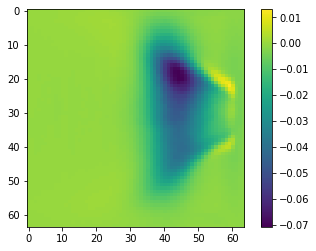

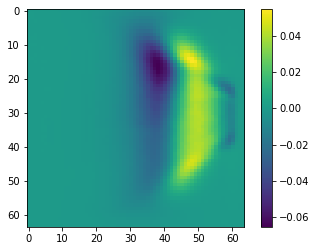

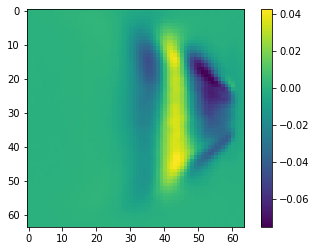

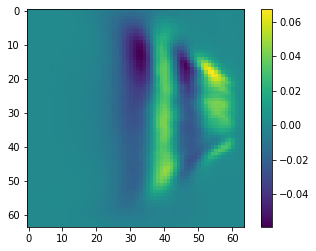

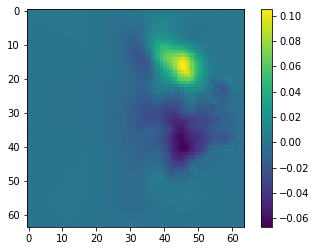

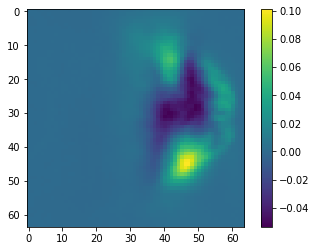

In [7]:
# Task 6: check if you obtain the same results using the SVD
# (Bonus): check which algorithm is faster

U, Sigma, Vt = np.linalg.svd(X0, full_matrices=False)
V = Vt.T

for i in range(6):
    fig, ax = plt.subplots()
    im = ax.imshow(U[:,i].reshape(resolution))
    fig.colorbar(im)
    plt.show()

In [8]:
# Task 7: check the orthogonality of both the POD modes and POD coefficients

print(f'The inner product between v0 and v0 is :{np.dot(V[:,0], V[:,0]):.1e}')
print(f'The inner product between v0 and v1 is :{np.dot(V[:,0], V[:,1]):.1e}')

print(f'The inner product between u0 and u0 is :{np.dot(U[:,0], U[:,0]):.1e}')
print(f'The inner product between u0 and u1 is :{np.dot(U[:,0], U[:,1]):.1e}')

The inner product between v0 and v0 is :1.0e+00
The inner product between v0 and v1 is :-1.1e-16
The inner product between u0 and u0 is :1.0e+00
The inner product between u0 and u1 is :3.1e-16


The relative information contained in the first 16 modes is: 91%


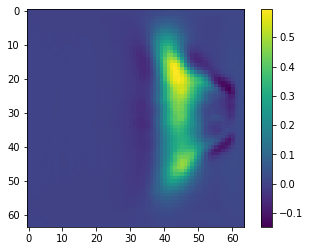

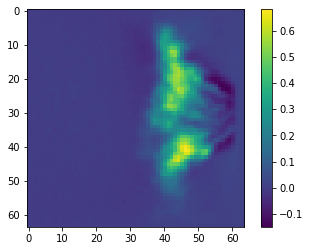

In [9]:
# Task 8: reconstruct the first snapshot using only 16 modes. Compare the reconstruction with the original snapshot.
#         quantify the relative amount of information contained in the first 16 modes.

q = 16
X0_rec = Z[:, :q] @ V[:,:q].T
error = X0_rec[:,0] - X0[:,0]

rel_info = 100*np.sum(L[:q])/np.sum(L)

print(f'The relative information contained in the first {q} modes is: {rel_info:.0f}%')

fig, ax = plt.subplots()
im = ax.imshow(X0_rec[:,0].reshape(resolution))
fig.colorbar(im)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(X0[:,0].reshape(resolution))
fig.colorbar(im)
plt.show()


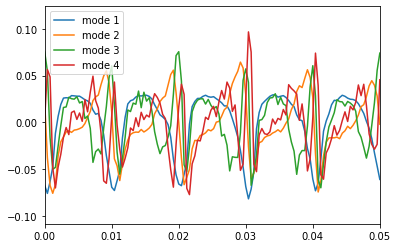

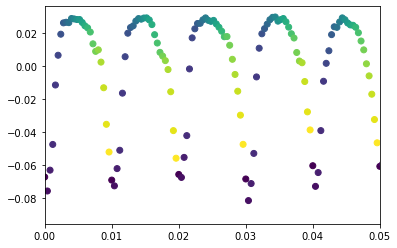

In [11]:
# Task 9: plot the behaviour of the first 6 POD coefficients v in time, from t = 0s to t = 0.05s.
#         In a separate plot, color the values of v0 based on the phase angle, considering a period T = 1/100 s.

time = np.linspace(0, m*dt, m)

n_cycle = 2500/100
phase_angle = 2*np.pi*(np.arange(m) % n_cycle)/n_cycle

labels = [f'mode {i+1}' for i in range(4)]
for i in range(4):
    plt.plot(time, V[:,i], label=labels[i])

plt.xlim(0, 0.05)
plt.legend()
plt.show()

plt.scatter(time, V[:,0], c=phase_angle)
plt.xlim(0, 0.05)
plt.show()

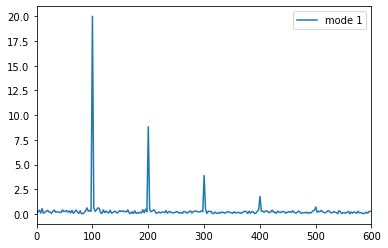

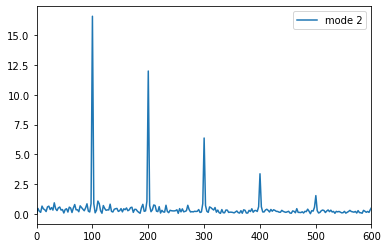

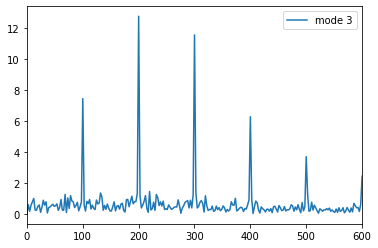

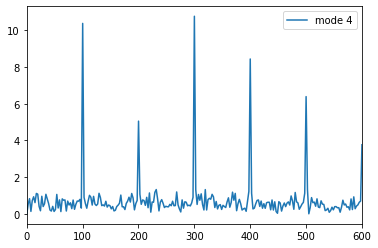

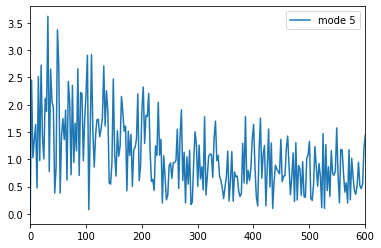

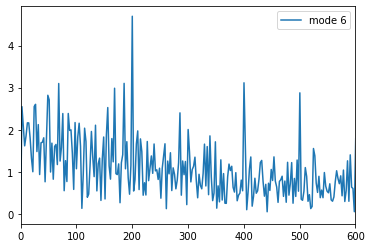

In [12]:
# Task 10: compute and plot the frequency spectrum of the first 6 POD coefficients.
from numpy.fft import fft, fftshift, fftfreq

frequency = fftshift(fftfreq(m, dt))
labels = [f'mode {i+1}' for i in range(6)]
for i in range(6):
    spectrum = np.abs(fftshift(fft(V[:,i])))
    plt.plot(frequency, spectrum, label=labels[i])
    plt.xlim(0, 600)
    plt.legend()
    plt.show()

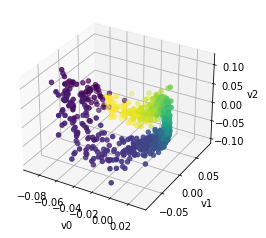

In [13]:
# Task 11: plot the q=2 low-dimensional manifold (i.e. the POD coefficients 0 and 1). 
# (Bonus): plot the q=3 manifold and color it by the phase angle.

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(V[:,0], V[:,1], V[:,3], c=phase_angle)

ax.set_xlabel('v0')
ax.set_ylabel('v1')
ax.set_zlabel('v2')

plt.show()

In [ ]:
# (Bonus): if you completed all the tasks and you are bored, create the animation 
#          of the moving flame.